# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [15]:
import numpy
import matplotlib.pyplot as plt
import skimage.io



---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

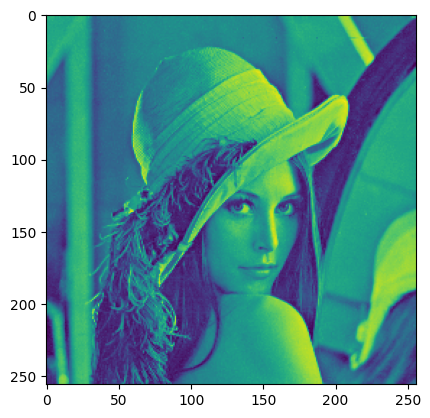

In [16]:
lena=plt.imread("data/lena.png")
plt.imshow(lena)


**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [17]:
def prewitt_h(img):
    filter=numpy.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    result=numpy.zeros(img.shape)
    n=(3-1)//2
    mean=0
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        neighborhood=0
        for q in numpy.ndindex(3,3):
            weight=filter[q[1],q[0]]
            x=p[1]+q[1]
            y=p[0]+q[0]

            neighborhood=neighborhood+(weight*img[x,y])
        prew=(1/(6))*neighborhood
        result[p[1]+n,p[0]+n]=prew
    return result
    

def prewitt_v(img):
    filter=numpy.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    result=numpy.zeros(img.shape)
    n=(3-1)//2
    mean=0
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        neighborhood=0
        for q in numpy.ndindex(3,3):
            weight=filter[q[1],q[0]]
            x=p[1]+q[1]
            y=p[0]+q[0]
            
            neighborhood=neighborhood+(weight*img[x,y])
        prew=(1/(6))*neighborhood
        result[p[1]+n,p[0]+n]=prew
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

In [18]:
lenah=prewitt_h(lena)
lenav=prewitt_v(lena)

In [19]:
imgh=skimage.io.imread("data/lena_prewitt_h.tiff")
imgv=skimage.io.imread("data/lena_prewitt_v.tiff")
assert numpy.allclose(imgh, lenah, atol=1/255)
assert numpy.allclose(imgv, lenav, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

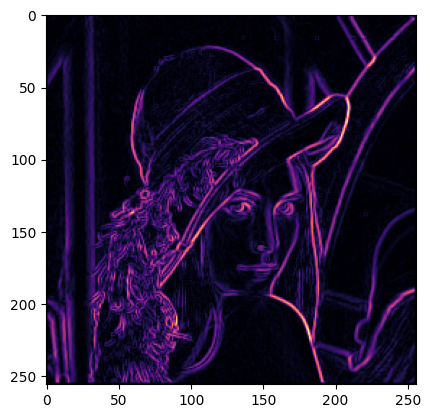

In [20]:
mag=numpy.sqrt((prewitt_h(lena)*prewitt_h(lena))+(prewitt_v(lena)*prewitt_v(lena)))
plt.imshow(mag,"magma")

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

In [22]:
lenag=skimage.io.imread("data/lena_prewitt_gradmag.tiff")
assert numpy.allclose(mag, lenag, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [23]:
def sobel_h(img):
    filter=numpy.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    result=numpy.zeros(img.shape)
    n=(3-1)//2
    mean=0
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        neighborhood=0
        for q in numpy.ndindex(3,3):
            weight=filter[q[1],q[0]]
            x=p[1]+q[1]
            y=p[0]+q[0]
            
            neighborhood=neighborhood+(weight*img[x,y])
        prew=(1/(8))*neighborhood
        result[p[1]+n,p[0]+n]=prew
    return result

def sobel_v(img):
    filter=numpy.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    result=numpy.zeros(img.shape)
    n=(3-1)//2
    mean=0
    for p in numpy.ndindex(img.shape[1]-2*n,img.shape[0]-2*n):
        neighborhood=0
        for q in numpy.ndindex(3,3):
            weight=filter[q[1],q[0]]
            x=p[1]+q[1]
            y=p[0]+q[0]
            
            neighborhood=neighborhood+(weight*img[x,y])
        prew=(1/(8))*neighborhood
        result[p[1]+n,p[0]+n]=prew
    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

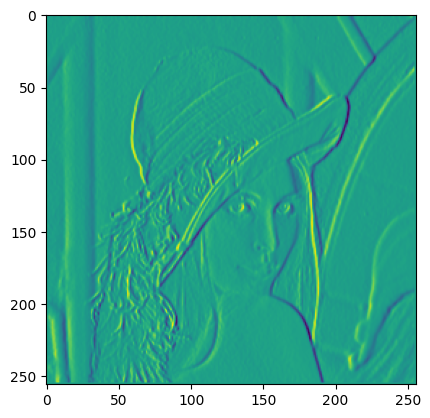

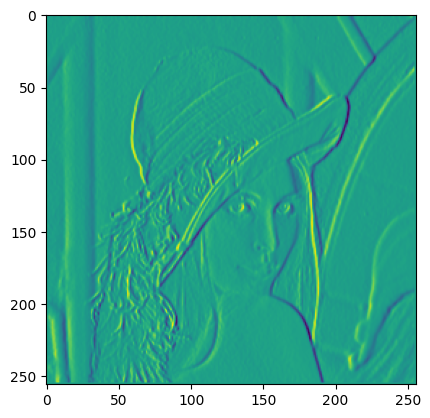

In [25]:
lenash=sobel_h(lena)
plt.figure()
plt.imshow(lenash)
lenasv=sobel_v(lena)
plt.figure()
plt.imshow(lenash)

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

In [ ]:
sobelh=skimage.io.imread("data/lena_sobel_h.tiff")
sobelv=skimage.io.imread("data/lena_sobel_v.tiff")
assert numpy.allclose(lenash, sobelh, atol=1/255)
assert numpy.allclose(lenasv, sobelv, atol=1/255)
